In [8]:
# import the necessary packages
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#input data from excel
training = pd.read_excel('Training dataset.xlsx')
testing = pd.read_excel('Testing dataset.xlsx')
training

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Descriptive statistics
training.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,2000.000,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,...,2000.000000,2000.000000,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,4.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.097000,0.006500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.337972,0.290689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,194.000000,13.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Descriptive statistics
testing.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,200.000000,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,...,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.879489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


D:\ruanjian\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    200
1    200
2    200
3    200
4    200
5    200
6    200
7    200
8    200
9    200
Name: label, dtype: int64

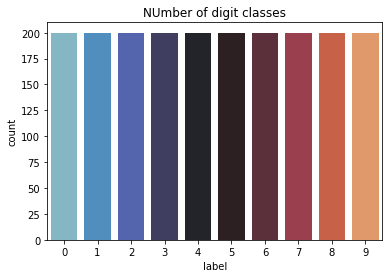

In [12]:
# Visualizing the number of class and counts in the datasets

plt.plot(figure = (8,6))
g = sns.countplot( training["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
training.label.astype('category').value_counts()

In [10]:
#Create dataset of features and labels for both training and testing
X_train = training.iloc[0:2000, 1:785]
y_train = training.iloc[0:2000, 0:1].values.ravel()

X_test = testing.iloc[0:200, 1:785]
y_test = testing.iloc[0:200,0:1].values.ravel()

In [11]:
# Set the hyperparameters to find the best one for model
kernel=['poly', 'rbf', 'sigmoid']
# Compute confusion matrix for each hyperparameters
for i in kernel:
        print ('For kernel:',i)
        # creating a KFold object with 3 splits 
        kf= KFold(n_splits=3)
        # fit the model
        clf = SVC(kernel=i,C=1)
        # configure the cross-validation peocess and output accuracy, precision, and recall 
        for train_index, val_index in kf.split(X_train):
            clf.fit(X_train.iloc[train_index,:], y_train[train_index])
            pred = clf.predict(X_train.iloc[val_index,:])
            print('For folds:','\n',classification_report(y_train[val_index], pred))
        # predict the value
        y_pred=model.predict(X_test)
        #Compute confusion matrix
        print ('For test data:','\n','Confusion matrix:','\n',confusion_matrix(y_test, y_pred))
        print ('Classification metrics:','\n',classification_report(y_test, y_pred, labels=range(0,10)))

For kernel: poly
For folds: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        58
           1       0.75      0.97      0.85        74
           2       0.93      0.86      0.89        78
           3       0.91      0.82      0.86        76
           4       0.93      0.89      0.91        63
           5       0.93      0.82      0.87        68
           6       0.94      0.92      0.93        51
           7       0.91      0.92      0.91        63
           8       0.85      0.87      0.86        67
           9       0.88      0.87      0.88        69

    accuracy                           0.89       667
   macro avg       0.89      0.89      0.89       667
weighted avg       0.89      0.89      0.89       667

For folds: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        63
           1       0.70      1.00      0.83        64
           2       0.96      0.83  